In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import GPy
import numpy.linalg as LA


## Waypoint data

In [2]:
from numpy import savetxt
from scipy.interpolate import CubicSpline

In [3]:
x_list = []
y_list = []
th_list = []
Dl_list = []
Dr_list = []

input_file = "wp-2020-05-28-18-44-56.csv"
with open(input_file) as csv_file:
    reader = csv.reader(csv_file)
    for line in reader:
        x_list.append(float(line[0]))
        y_list.append(float(line[1]))
        th_list.append(float(line[2]))
        Dl_list.append(float(line[3]))
        Dr_list.append(float(line[4]))  
        
N = len(x_list)
N

1693

In [4]:
left_border = {'x': [], 'y': []}
right_border = {'x': [], 'y': []}
center = {'x': [], 'y': []}
for i in range(N):
    left_border['x'].append(x_list[i]-Dl_list[i]*np.sin(th_list[i]))
    left_border['y'].append(y_list[i]+Dl_list[i]*np.cos(th_list[i]))
    right_border['x'].append(x_list[i]+Dr_list[i]*np.sin(th_list[i]))
    right_border['y'].append(y_list[i]-Dr_list[i]*np.cos(th_list[i]))
    center['x'].append(x_list[i]+(Dr_list[i]-Dl_list[i])*np.sin(th_list[i]))
    center['y'].append(y_list[i]-(Dr_list[i]-Dl_list[i])*np.cos(th_list[i]))


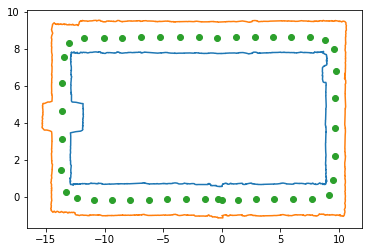

In [29]:
plt.plot(left_border['x'], left_border['y'])
plt.plot(right_border['x'], right_border['y'])
plt.plot(x_list[::40], y_list[::40], 'o')
plt.show()

## Waypoint for MPC

In [23]:
l_list = np.arange(0, N, 1)
x = l_list[::80]
y = x_list[::80]
cs = CubicSpline(x, y)
xnew = l_list[::1]
x_list_new = cs(xnew)

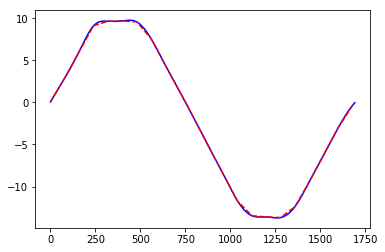

In [24]:
plt.figure()
plt.plot(xnew, x_list_new, 'b')
plt.plot(x, y, 'r--')
plt.show()

In [25]:
x = l_list[::80]
y = y_list[::80]
cs = CubicSpline(x, y)
xnew = l_list[::1]
y_list_new = cs(xnew)


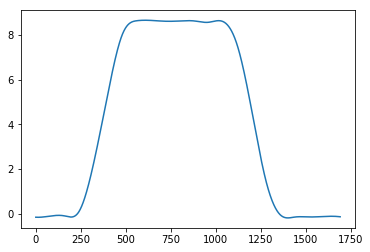

In [26]:
plt.plot(cs(xnew))

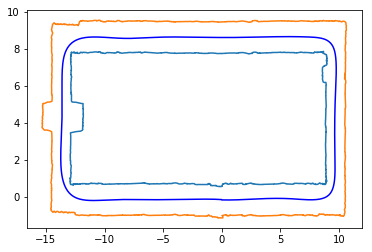

In [27]:
plt.figure()
plt.plot(x_list_new, y_list_new, 'b')
plt.plot(left_border['x'], left_border['y'])
plt.plot(right_border['x'], right_border['y'])

In [28]:
# data = np.empty((N,2))
# data[:,0] = x_list_new
# data[:,1] = y_list_new
# savetxt('data.csv', data, delimiter=',')

## Derivative of cubic spline

In [11]:
x = l_list[::40]
y = x_list[::40]
cs = CubicSpline(x, y)
xnew = l_list[::1]
y_list_new = cs(xnew)
cs1 = cs.derivative(1)
dx_list = cs1(xnew)

In [12]:
x = l_list[::40]
y = y_list[::40]
cs = CubicSpline(x, y)
xnew = l_list[::1]
y_list_new = cs(xnew)
cs1 = cs.derivative(1)
dy_list = cs1(xnew)

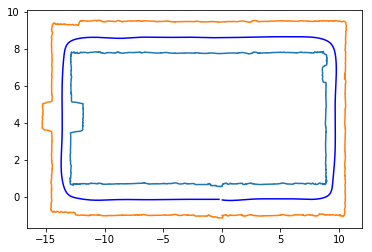

In [13]:
plt.figure()
plt.plot(x_list_new, y_list_new, 'b')
plt.plot(left_border['x'], left_border['y'])
plt.plot(right_border['x'], right_border['y'])

In [14]:
A = np.empty((N, 2))
B = np.empty(N)
for i in range(N):
    A[i, 0] = dy_list[i]; A[i, 1] = -dx_list[i]
    B[i] = A[i, 0]*x_list_new[i] + A[i, 1]*y_list_new[i]
    

In [15]:
x_right = np.empty(N)
y_right = np.empty(N)

for i in range(N):
    a = A[i, 0]; b = A[i, 1]; c = B[i] 
    x0 = x_list_new[i]; y0 = y_list_new[i] 
    d = Dr_list[i]
    M = [[a, b],[-b, a]]
    p = [c+d*LA.norm([a,b]), a*y0-b*x0]
    sol = LA.solve(M, p)
    x_right[i] = sol[0]
    y_right[i] = sol[1]

In [16]:
x_left = np.empty(N)
y_left = np.empty(N)

for i in range(N):
    a = A[i, 0]; b = A[i, 1]; c = B[i] 
    x0 = x_list_new[i]; y0 = y_list_new[i] 
    d = Dl_list[i]
    M = [[a, b],[-b, a]]
    p = [c-d*LA.norm([a,b]), a*y0-b*x0]
    sol = LA.solve(M, p)
    x_left[i] = sol[0]
    y_left[i] = sol[1]

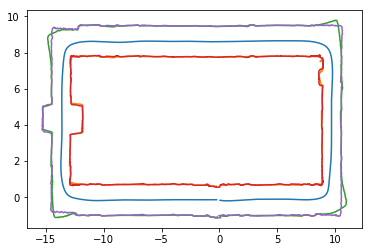

In [20]:
plt.plot(x_list_new, y_list_new)
plt.plot(x_left, y_left)
plt.plot(x_right, y_right)
plt.plot(left_border['x'], left_border['y'])
plt.plot(right_border['x'], right_border['y'])

In [18]:
for k in range(N):
    h = A[k, 0]*x_list_new[k] + A[k, 1]*y_list_new[k] - B[k] 
    print(h)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [19]:
data = np.empty((N,7))
data[:,0] = x_list_new
data[:,1] = y_list_new
data[:,2:4] = A
data[:,4] = B
data[:,5] = Dl_list
data[:,6] = Dr_list

savetxt('data-for-mpc.csv', data, delimiter=',')

## Visualize GP training data

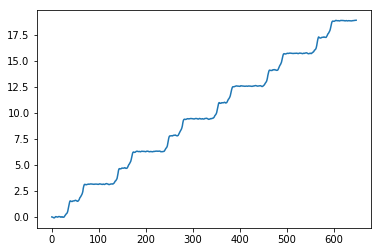

In [312]:
x_list = []
y_list = []
th_list = []
v_list = []
delta_list = []
gt_x_list = []
gt_y_list = []
gt_th_list = []

input_file = "/Users/vietanhle/Jupyter_Notebook/traningdata-2020-05-28-18-56-26.csv"
with open(input_file) as csv_file:
    reader = csv.reader(csv_file)
    for line in reader:
        x_list.append(float(line[0]))
        y_list.append(float(line[1]))
        th_list.append(float(line[2]))
        v_list.append(float(line[3]))
        delta_list.append(float(line[4]))
        gt_x_list.append(float(line[5]))
        gt_y_list.append(float(line[6]))
        gt_th_list.append(float(line[7]))        
N = len(x_list)


for i in range(50,150):
    if th_list[i] < 0:
        th_list[i] = th_list[i] + 2*np.pi
    if gt_th_list[i] < 0:
        gt_th_list[i] = gt_th_list[i] + 2*np.pi
        
for i in range(150,N):
        th_list[i] = th_list[i] + 2*np.pi
        gt_th_list[i] = gt_th_list[i] + 2*np.pi
        
for i in range(250,350):
    if th_list[i] < 2*np.pi:
        th_list[i] = th_list[i] + 2*np.pi
    if gt_th_list[i] < 2*np.pi:
        gt_th_list[i] = gt_th_list[i] + 2*np.pi
        
for i in range(350,N):
        th_list[i] = th_list[i] + 2*np.pi
        gt_th_list[i] = gt_th_list[i] + 2*np.pi
        
for i in range(450,600):
    if th_list[i] < 4*np.pi:
        th_list[i] = th_list[i] + 2*np.pi
    if gt_th_list[i] < 4*np.pi:
        gt_th_list[i] = gt_th_list[i] + 2*np.pi
        
for i in range(600,N):
        th_list[i] = th_list[i] + 2*np.pi
        gt_th_list[i] = gt_th_list[i] + 2*np.pi
        
plt.plot(th_list)
        

In [313]:
dx_list = np.array(x_list[1:-1]) - np.array(x_list[0:-2])
dy_list = np.array(y_list[1:-1]) - np.array(y_list[0:-2])
dth_list = np.array(th_list[1:-1]) - np.array(th_list[0:-2])
v_list = np.array(v_list)
delta_list = np.array(delta_list)
cth_list = np.cos(th_list)
sth_list = np.sin(th_list)

gt_dx_list = np.array(gt_x_list[1:-1]) - np.array(gt_x_list[0:-2])
gt_dy_list = np.array(gt_y_list[1:-1]) - np.array(gt_y_list[0:-2])
gt_dth_list = np.array(gt_th_list[1:-1]) - np.array(gt_th_list[0:-2])

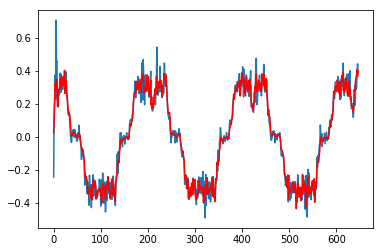

In [314]:
plt.plot(dx_list)
plt.plot(gt_dx_list, 'r')
plt.show()

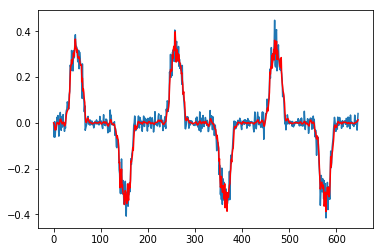

In [315]:
plt.plot(dy_list)
plt.plot(gt_dy_list, 'r')
plt.show()

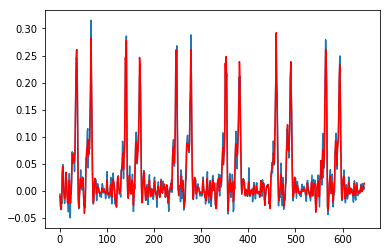

In [316]:
plt.plot(dth_list)
plt.plot(gt_dth_list, 'r')
plt.show()

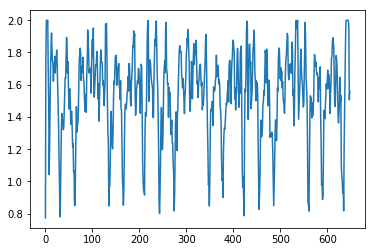

In [317]:
plt.plot(v_list)

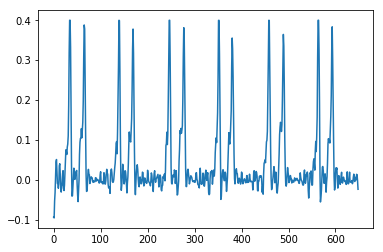

In [318]:
plt.plot(delta_list)

In [319]:
dx_f = np.empty(N-2)
dx_f[0] = dx_list[0]
for i in range(N-3):
    dx_f[i+1] = (dx_list[i] + 9*dx_f[i])/10

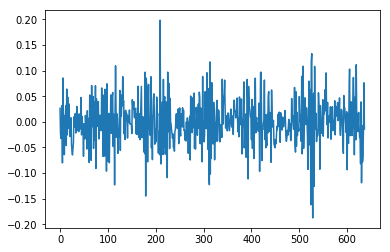

In [320]:
plt.plot(dx_list[10:] - gt_dx_list[10:])


In [131]:
np.exp(1)

2.718281828459045